# Overall Analysis
There is a strong correlation between the maximum forecasted temperature and degrees latitude of a given city. This relationship was stronger for the northern hemisphere than the Southern Hemisphere. This correlation makes senses, cities nearer to the equator experience more solar exposure and more consistent heating through out the year. As latitude increases, cities experience increasingly more dynamic changes in solar exposure and heating through out the year. These higher latitude areas receive less solar energy overall.

There is a moderate negative correlation between maximum forecasted temperature and humidity. This makes sense when you consider inland plains and desert regions. These areas are dry with low humidity, but have high daytime temperatures. This relationship breaks down in coastal areas or near other large bodies of water. These areas become extremelly humid with high temperatures due to increases in evaporation off of these large bodies of water. 

There is a weak positive correlation between cloudiness and humidity. The weak nature of this relationship makes sense when you consider thunderstorms in inland dry regions, and continual humidity in coastal regions. Dry regions will experience a positive change in humidity when a storm passes through, and then a negative change in humidity when the skies are clear. In contrast, coastal regions can experience extreme humidty without a cloud in the sky

The next step in this analysis would be to test this hypothesis. This could be done by conducting on another round of analysis on data divided between coastal and inland cities. I expect we would see different correlations for each of these groups.

In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from random import sample
from citipy import citipy
import numpy as np
import requests
import scipy.stats as st
from pprint import pprint

# import API key from file
from apikey import weatherkey


In [5]:
# generate a list 500 random coordinate pairs that are well distributed across the coordinate range
longitudes = []
latitudes = []
longitudes = np.array(sample(range(-18000,18001),k=1500))/100
latitudes = np.array(sample(range(-9000,9001),k=1500))/100
coordinates = zip(latitudes,longitudes)

In [6]:
# import citipy, create a list of cities from the random coordinate pairs
citylist = []

for entry in coordinates:
    cityname = citipy.nearest_city(entry[0],entry[1]).city_name
    if cityname not in citylist:
        citylist.append(cityname)
   # print(citylist)
    #coordinates["Nearest City"] = citipy.nearest_city(coordinates['latitudes'],coordinates['longitudes']).city_name

In [7]:
#set up loop for each city in citylist
    # make an api call to openweathermap's API
baseurl = "https://api.openweathermap.org/data/2.5/weather?"

citynames = []
citylats = []
citylons = []
country = []
timezone = []
citycount = 1
for city in citylist:
    response = requests.get(f"{baseurl}appid={weatherkey}&units=imperial&q={city}").json()
    try:
        citynames.append(response["name"])
        citylats.append(response["coord"]['lat'])
        citylons.append(response["coord"]['lon'])
        country.append(response["sys"]["country"])
        timezone.append(response["timezone"])
        print(f"{citycount} Information for {city} successfully retreived")
        citycount += 1
    except (KeyError, IndexError):
        print(f'FAIL: Unable to retrive information for {city}')
        

1 Information for codrington successfully retreived
2 Information for mataura successfully retreived
3 Information for rikitea successfully retreived
4 Information for kodiak successfully retreived
5 Information for ushuaia successfully retreived
6 Information for qaanaaq successfully retreived
7 Information for pangnirtung successfully retreived
8 Information for bredasdorp successfully retreived
9 Information for luderitz successfully retreived
10 Information for bakchar successfully retreived
11 Information for tiksi successfully retreived
12 Information for aklavik successfully retreived
13 Information for osoyoos successfully retreived
14 Information for srednekolymsk successfully retreived
15 Information for aripuana successfully retreived
16 Information for yellowknife successfully retreived
17 Information for ribeira grande successfully retreived
18 Information for port alfred successfully retreived
19 Information for butaritari successfully retreived
20 Information for porband

In [8]:
# Convert retrieved information to a data frame
citydata = pd.DataFrame.from_dict({"City Name":citynames,"Latitude":citylats,"Longitude":citylons,"Country":country,"UTC +/- (hours)":np.array(timezone)/3600})
display(citydata)

,City Name,Latitude,Longitude,Country,UTC +/- (hours)
0,Codrington,-38.2667,141.9667,AU,10.0
1,Mataura,-46.1927,168.8643,NZ,12.0
2,Rikitea,-23.1203,-134.9692,PF,-9.0
3,Saint Paul Harbor,57.7900,-152.4072,US,-8.0
4,Ushuaia,-54.8000,-68.3000,AR,-3.0
...,...,...,...,...,...
549,Vilyuysk,63.7553,121.6247,RU,9.0
550,Puerto del Rosario,28.5004,-13.8627,ES,1.0
551,La Providencia,28.7167,-111.5833,MX,-7.0
552,Yelizovo,53.1873,158.3805,RU,12.0


In [10]:
#Save dataframe to a csv file
citydata.to_csv(r'..\\Data\\City_data.csv')

In [11]:
onecall = "https://api.openweathermap.org/data/2.5/onecall?"
citydata["Max Temperature"] = ""
citydata["Humidity"] = ""
citydata["Cloudiness"] = ""
citydata["Wind Speed"] = ""
exclude = "current,minutely,hourly,alerts"
citycounts =1

for index, row in citydata.iterrows():
    lat = row["Latitude"]
    lon = row["Longitude"]
    onecallresponse = (requests.get(f"{onecall}lat={lat}&lon={lon}&exclude={exclude}&appid={weatherkey}&units=imperial").json()
                       ['daily'][0])
    try:
        citydata.loc[index, 'Max Temperature'] = onecallresponse['temp']['max']
        citydata.loc[index, 'Humidity'] = onecallresponse['humidity']
        citydata.loc[index, 'Cloudiness'] = onecallresponse['clouds']
        citydata.loc[index, 'Wind Speed'] = onecallresponse['wind_speed']
        print(f'{citycounts} Information successfully retreived for {citydata.loc[index,"City Name"]}')
        citycounts += 1
    except (KeyError, IndexError, SSLEOFError,SSLError):
        print(f'FAIL: Unable to retrieve information for {citydata.loc[index,"City Name"]}')
display(citydata)

1 Information successfully retreived for Codrington
2 Information successfully retreived for Mataura
3 Information successfully retreived for Rikitea
4 Information successfully retreived for Saint Paul Harbor
5 Information successfully retreived for Ushuaia
6 Information successfully retreived for Qaanaaq
7 Information successfully retreived for Pangnirtung
8 Information successfully retreived for Bredasdorp
9 Information successfully retreived for Lüderitz
10 Information successfully retreived for Bakchar
11 Information successfully retreived for Tiksi
12 Information successfully retreived for Aklavik
13 Information successfully retreived for Osoyoos
14 Information successfully retreived for Srednekolymsk
15 Information successfully retreived for Aripuanã
16 Information successfully retreived for Yellowknife
17 Information successfully retreived for Ribeira Grande
18 Information successfully retreived for Port Alfred
19 Information successfully retreived for Butaritari
20 Information 

,City Name,Latitude,Longitude,Country,UTC +/- (hours),Max Temperature,Humidity,Cloudiness,Wind Speed
0,Codrington,-38.2667,141.9667,AU,10.0,69.89,53,81,13.67
1,Mataura,-46.1927,168.8643,NZ,12.0,59.16,66,46,5.03
2,Rikitea,-23.1203,-134.9692,PF,-9.0,78.93,84,95,24.34
3,Saint Paul Harbor,57.7900,-152.4072,US,-8.0,44.6,68,100,14.03
4,Ushuaia,-54.8000,-68.3000,AR,-3.0,42.06,84,92,3.38
...,...,...,...,...,...,...,...,...,...
549,Vilyuysk,63.7553,121.6247,RU,9.0,39.25,90,100,7.74
550,Puerto del Rosario,28.5004,-13.8627,ES,1.0,68.58,54,31,18.72
551,La Providencia,28.7167,-111.5833,MX,-7.0,89.91,23,4,15.37
552,Yelizovo,53.1873,158.3805,RU,12.0,35.92,94,94,3.83


In [12]:
#Save data to a csv file. This can be used to load data into memory for analysis
citydata.to_csv(r'..\\Data\\forecast_data.csv')

In [13]:
#convert data types for analysis
citydata["Max Temperature"] = pd.to_numeric(citydata["Max Temperature"])
citydata["Humidity"] = pd.to_numeric(citydata["Humidity"])
citydata["Cloudiness"] = pd.to_numeric(citydata["Cloudiness"])
citydata["Wind Speed"] = pd.to_numeric(citydata["Wind Speed"])
citydata = citydata.rename(columns={"Wind Speed": "Wind Speed (MPH)","Max Temperature":"Max Temperature (F)"})

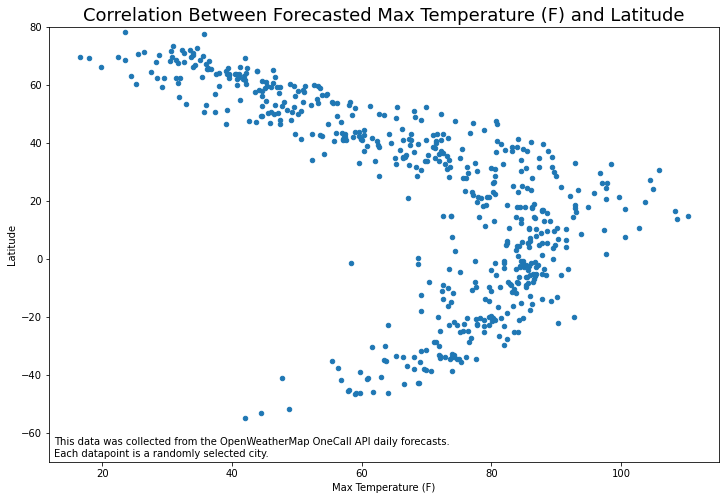

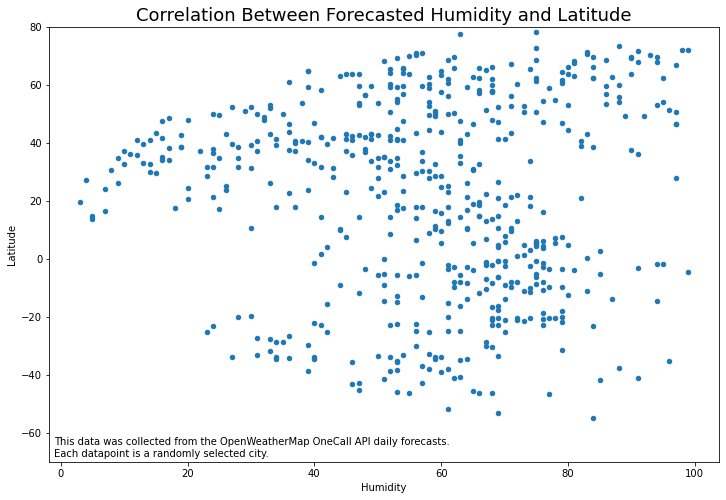

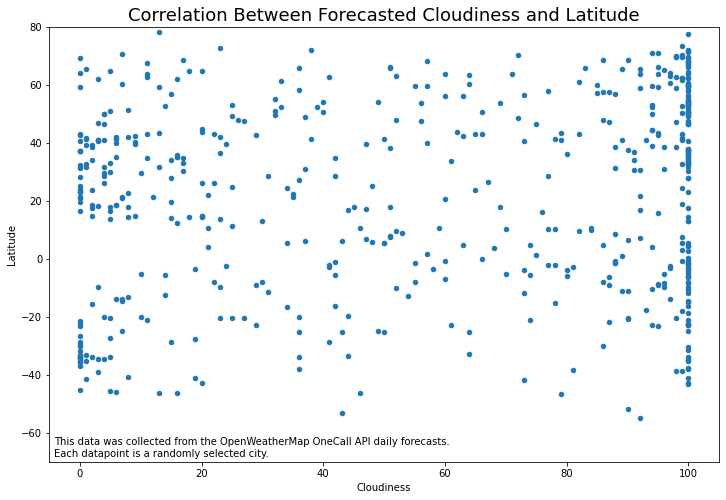

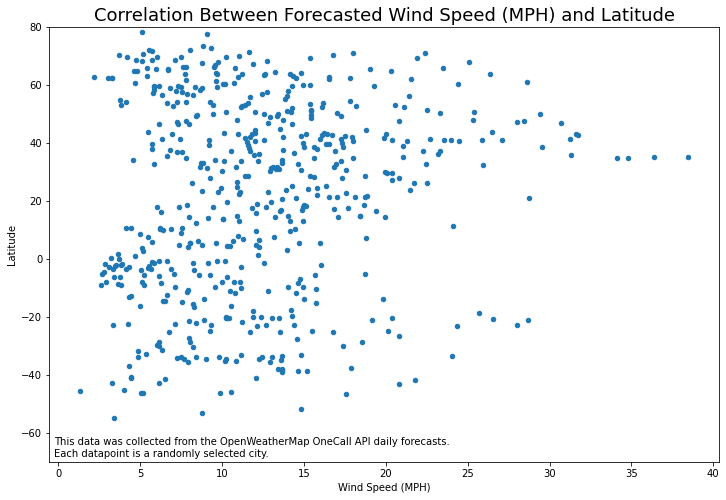

In [19]:
comparelist = ['Max Temperature (F)','Humidity','Cloudiness','Wind Speed (MPH)']
for element in comparelist:
    citydata.plot.scatter(element,"Latitude", figsize = (12,8),ylim=(-70,80))
    plt.title(f'Correlation Between Forecasted {element} and Latitude', fontsize=18)
    plt.annotate(f'''This data was collected from the OpenWeatherMap OneCall API daily forecasts.
Each datapoint is a randomly selected city.''',xy=(5,5),xycoords="axes pixels",fontsize = 10)
    imagename = f"..\\Images\\Global{element}vslat.png"
    plt.savefig(imagename)

#for each variable in list
    #plot scatter plot vs latitude
    #export each plot to a png file
    #if lat 
        # plot all possible scatter plots vs latitude
        #run linear regression for each plot
        #add regression results to the plot
        #export plot to png file
    #else
        #do the same as above on separate plots
        

In [15]:
# Split the data by hemisphere
southernhemisphere = pd.DataFrame
southernhemisphere =citydata[citydata['Latitude']<0]

northernhemisphere = pd.DataFrame
northernhemisphere = citydata[citydata['Latitude']>0]

#Check for correlations
display(southernhemisphere.corr())
display(northernhemisphere.corr())

,Latitude,Longitude,UTC +/- (hours),Max Temperature (F),Humidity,Cloudiness,Wind Speed (MPH)
Latitude,1.000000,-0.138429,-0.177359,0.759350,0.287963,0.310519,-0.193107
Longitude,-0.138429,1.000000,0.909310,-0.056528,-0.084600,-0.152497,-0.106710
UTC +/- (hours),-0.177359,0.909310,1.000000,-0.077231,-0.071835,-0.110216,0.037177
Max Temperature (F),0.759350,-0.056528,-0.077231,1.000000,-0.097457,0.014507,-0.042991
Humidity,0.287963,-0.084600,-0.071835,-0.097457,1.000000,0.491406,-0.043957
Cloudiness,0.310519,-0.152497,-0.110216,0.014507,0.491406,1.000000,0.053090
Wind Speed (MPH),-0.193107,-0.106710,0.037177,-0.042991,-0.043957,0.053090,1.000000


,Latitude,Longitude,UTC +/- (hours),Max Temperature (F),Humidity,Cloudiness,Wind Speed (MPH)
Latitude,1.000000,0.054451,0.123744,-0.878626,0.193723,0.201510,-0.033890
Longitude,0.054451,1.000000,0.954459,-0.081292,0.089941,0.071224,-0.063880
UTC +/- (hours),0.123744,0.954459,1.000000,-0.154529,0.115499,0.103974,-0.078864
Max Temperature (F),-0.878626,-0.081292,-0.154529,1.000000,-0.507823,-0.259133,0.091167
Humidity,0.193723,0.089941,0.115499,-0.507823,1.000000,0.346373,-0.259048
Cloudiness,0.201510,0.071224,0.103974,-0.259133,0.346373,1.000000,-0.145628
Wind Speed (MPH),-0.033890,-0.063880,-0.078864,0.091167,-0.259048,-0.145628,1.000000


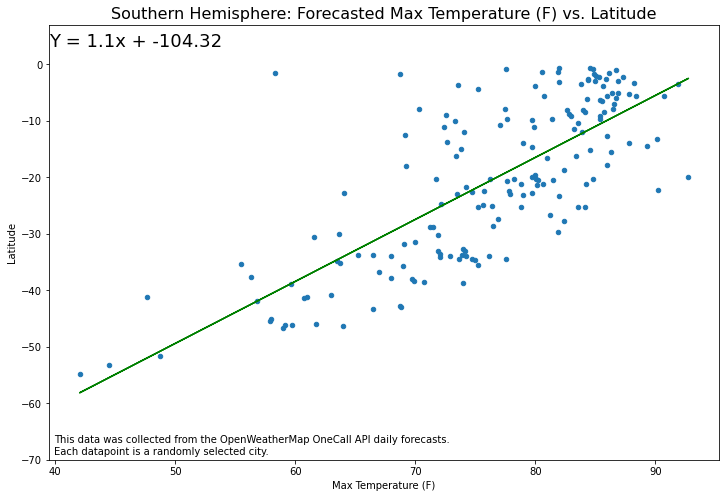

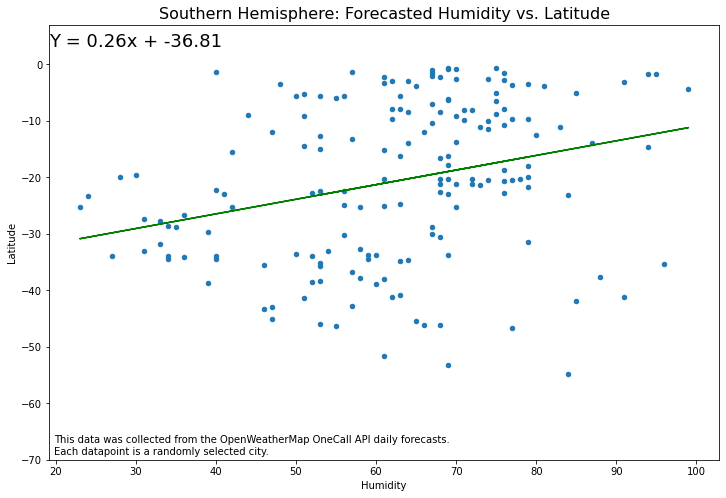

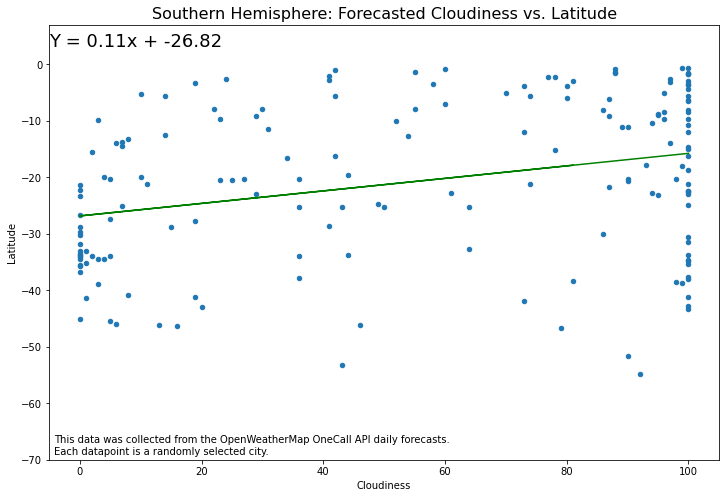

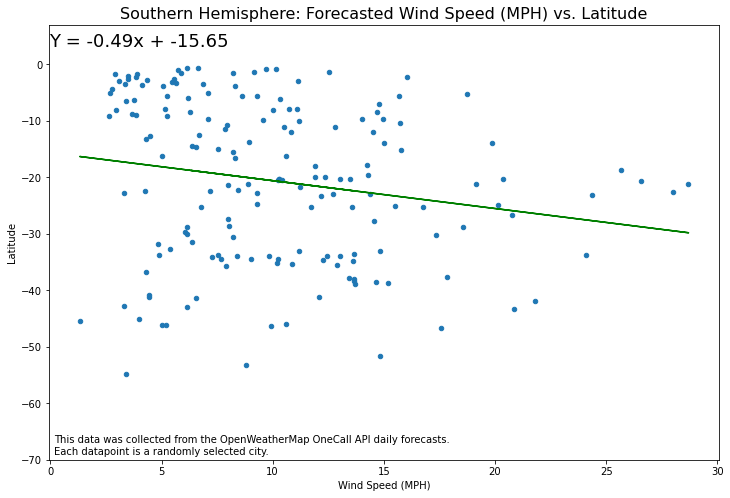

In [20]:
#Southern Hemisphere Visualizations

#Create a loop to make all plots
for element in comparelist:
    #Generate the base plot
    southernhemisphere.plot.scatter(element,"Latitude", figsize = (12,8),ylim = (-70,7))
   
    # perform linear regression and plot the resulting equation
    varaxis = southernhemisphere[f"{element}"]
    (m,b,rvalue,pvalue,stderr) = st.linregress(varaxis,southernhemisphere["Latitude"])
    linearfit = m * varaxis + b
    plt.plot(varaxis,linearfit,'green')
    
    #Improve the format of the visualization
    regressioneq = "Y = " + str(round(m,2)) + "x + " + str(round(b,2))
    plt.annotate(regressioneq,xy=(0,0.95),fontsize = 18,xycoords='axes fraction')
    plt.title(f'Southern Hemisphere: Forecasted {element} vs. Latitude', fontsize =16)
    plt.annotate(f'''This data was collected from the OpenWeatherMap OneCall API daily forecasts.
Each datapoint is a randomly selected city.''',xy=(5,5),xycoords="axes pixels",fontsize = 10)
    
    #Save to file
    imagename = f"..\\Images\\SH_{element}vslat.png"
    plt.savefig(imagename)

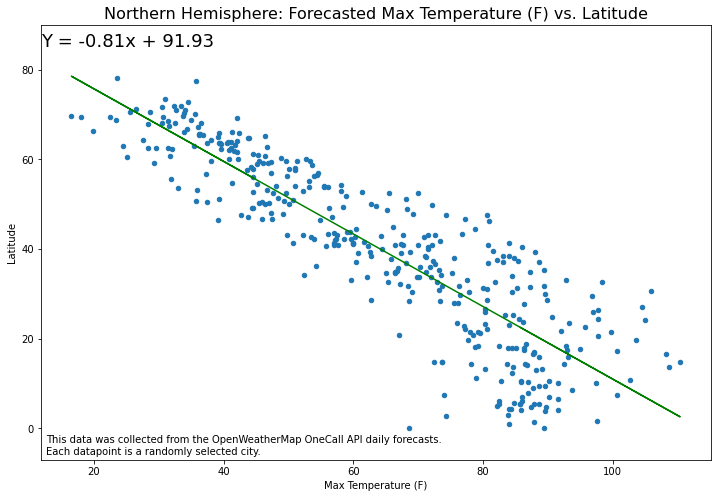

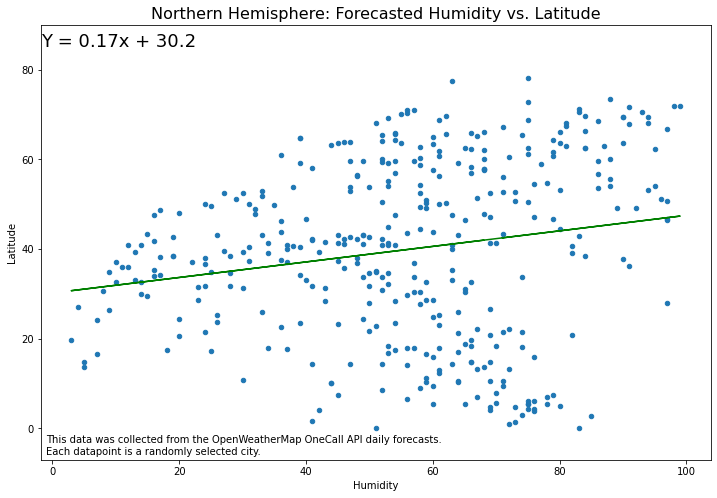

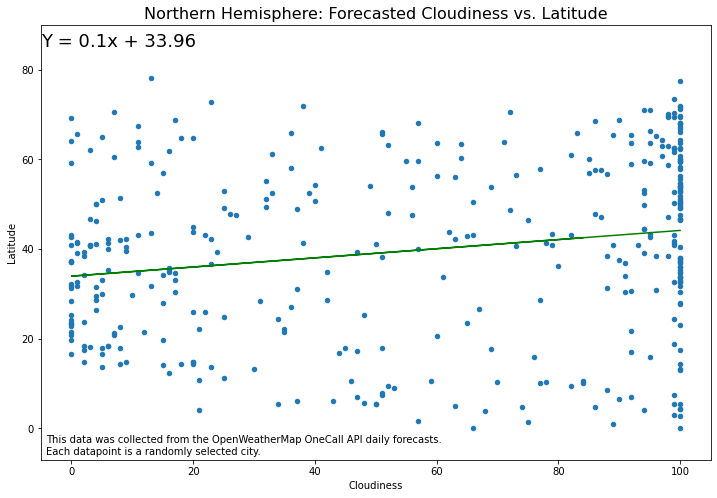

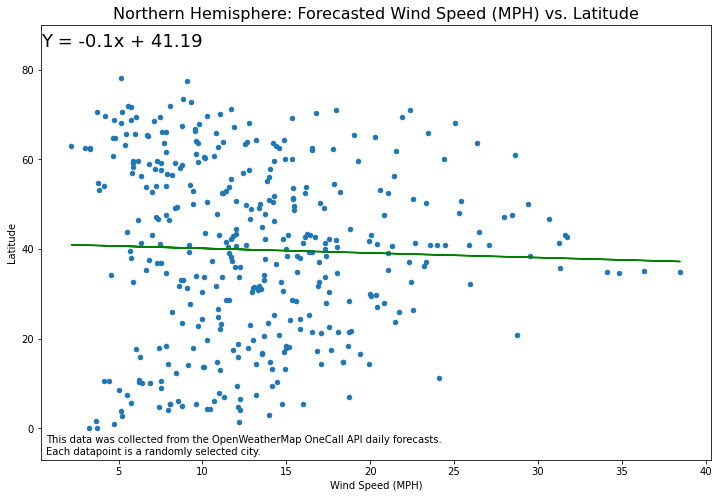

In [21]:
#Northern Hemisphere Visualizations

#Create a loop to make all plots
for element in comparelist:
    #Generate the base plot
    northernhemisphere.plot.scatter(element,"Latitude", figsize = (12,8),ylim = (-7,90))
   
    # perform linear regression and plot the resulting equation
    varaxis = northernhemisphere[f"{element}"]
    (m,b,rvalue,pvalue,stderr) = st.linregress(varaxis,northernhemisphere["Latitude"])
    linearfit = m * varaxis + b
    plt.plot(varaxis,linearfit,'green')
    
    #Improve the format of the visualization
    regressioneq = "Y = " + str(round(m,2)) + "x + " + str(round(b,2))
    plt.annotate(regressioneq,xy=(0,0.95),fontsize = 18,xycoords='axes fraction')
    plt.title(f'Northern Hemisphere: Forecasted {element} vs. Latitude', fontsize =16)
    plt.annotate(f'''This data was collected from the OpenWeatherMap OneCall API daily forecasts.
Each datapoint is a randomly selected city.''',xy=(5,5),xycoords="axes pixels",fontsize = 10)
    
    #Save to file
    imagename = f"..\\Images\\NH_{element}vslat.png"
    plt.savefig(imagename)